In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.enable_eager_execution()
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import time
import functools
import scipy.io

In [7]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim/long_dim
    
    new_shape = tf.cast(shape*scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [8]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)

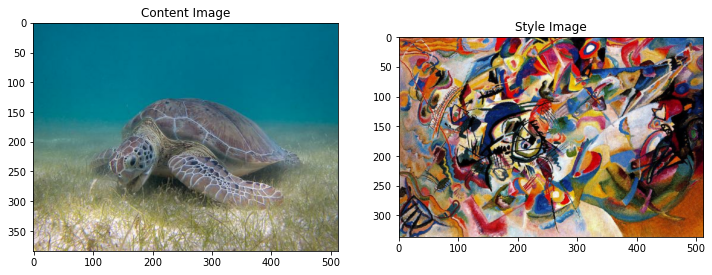

In [9]:
content_image = load_img('content_images/turtle.jpg')
style_image = load_img('style_images/kandinsky.jpg')

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [28]:
class VGG(object):
    # 加载vgg19数据集
    def __init__(self, input_img = None):
        self.vgg_layers = scipy.io.loadmat('pretrained-model/imagenet-vgg-verydeep-19.mat')['layers']
        self.input_img = input_img
        print(self.vgg_layers[0][0][0][0][2][0][0])

    # 获取指定层权重
    def _weight(self, layer_id, expected_layer_name):
        W = self.vgg_layers[0][layer_id][0][0][2][0][0]
        b = self.vgg_layers[0][layer_id][0][0][2][0][1]
VGG()  


MemoryError: 